In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab

In [2]:
CityConsump = pd.read_excel(os.path.join('../RAW_DATA/data_educative_app.xlsx'))
CityConsump = CityConsump[CityConsump['Secteur']=='Chauffage et autres'].loc[:,['Agent Énergétique', 'Année', 'Consommation (TJ)']]
CityConsump = CityConsump[CityConsump['Consommation (TJ)']!=0]

In [3]:
DegJour = pd.read_excel(os.path.join('../RAW_DATA/degré.jour_geneve.xlsx'))
DegJour = DegJour[DegJour['Année']>1999]
CityConsump = pd.merge(CityConsump, DegJour)

In [4]:
CityConsump['Consommation corrigée (TJ)'] = (CityConsump['Consommation (TJ)']/CityConsump['Degré.jour'])*2238
CityConsump

,Agent Énergétique,Année,Consommation (TJ),Degré.jour,Consommation corrigée (TJ)
0,Tous les agents énergétiques,2000,236182.071730,2238,236182.071730
1,Huile de chauffage extra-légère,2000,116294.887749,2238,116294.887749
2,Essence,2000,165.064314,2238,165.064314
3,Charbon,2000,130.000000,2238,130.000000
4,Gaz naturel,2000,36420.000000,2238,36420.000000
5,Bois et charbon de bois,2000,17910.000000,2238,17910.000000
6,"Géothermie, chaleur ambiante et énergie solair...",2000,3845.994979,2238,3845.994979
7,Electricité,2000,56616.124688,2238,56616.124688
8,Chaleur à distance,2000,4800.000000,2238,4800.000000
9,Tous les agents énergétiques,2001,247275.339909,2379,232619.676636


In [5]:
year = list(CityConsump['Année'].unique())
dem = 1 + 0.015
sre = [357e6]*16 # Initialisation année 2000

for i in range(16):
    sre[i] *= dem**i #  

OldSre = pd.DataFrame({'Année': year, 'SRE': sre}) # en m²

In [6]:
CoalCons = CityConsump[CityConsump['Agent Énergétique']=='Charbon']['Consommation corrigée (TJ)']
CoalCons.reset_index(drop=True, inplace=True)

OilCons = CityConsump[CityConsump['Agent Énergétique']=='Huile de chauffage extra-légère']['Consommation corrigée (TJ)']
OilCons.reset_index(drop=True, inplace=True)

GasCons  = CityConsump[CityConsump['Agent Énergétique']=='Gaz naturel']['Consommation corrigée (TJ)']
GasCons.reset_index(drop=True, inplace=True)

ElecCons  = CityConsump[CityConsump['Agent Énergétique']=='Electricité']['Consommation corrigée (TJ)']
ElecCons.reset_index(drop=True, inplace=True)
ElecCons = ElecCons - 22*(3600/1e9)*OldSre['SRE']

HeatPumpCons = 0.25*ElecCons
DirectElecCons = 0.75*ElecCons

DhCons  = CityConsump[CityConsump['Agent Énergétique']=='Chaleur à distance']['Consommation corrigée (TJ)']
DhCons.reset_index(drop=True, inplace=True)

WoodCons  = CityConsump[CityConsump['Agent Énergétique']=='Bois et charbon de bois']['Consommation corrigée (TJ)']
WoodCons.reset_index(drop=True, inplace=True)

TherCons  = CityConsump[CityConsump['Agent Énergétique']=='Géothermie, chaleur ambiante et énergie solaire thermique']['Consommation corrigée (TJ)']
TherCons.reset_index(drop=True, inplace=True)

TotCons = CityConsump[CityConsump['Agent Énergétique']=='Tous les agents énergétiques']['Consommation corrigée (TJ)']
TotCons.reset_index(drop=True, inplace=True)
TotCons = TotCons - 22*(3600/1e9)*OldSre['SRE'] - DhCons

In [7]:
CityEmis = pd.read_excel(os.path.join('../RAW_DATA/CO2-emissions.xlsx'), sheetname = 'Tous les GES par secteur CO2-V', skipfooter = 10)
CityEmis = CityEmis.iloc[2:,0]

Pop = pd.read_excel(os.path.join('../RAW_DATA/OFS/Données démographie suisse.xlsx'), sheetname = 'Population')
Pop = Pop.T
Pop.drop(Pop.index[0],inplace=True)
Pop.columns=['Population']

In [8]:
OldIdc = 1e6*TotCons / OldSre['SRE'] # en MJ/m²

In [9]:
OldEnerMix = pd.DataFrame({
    
    'year' : [2015],
    'coal' : CoalCons.iloc[-1]/TotCons.iloc[-1],
    'oil' : OilCons.iloc[-1]/TotCons.iloc[-1],
    'gas' : GasCons.iloc[-1]/TotCons.iloc[-1],
    'heating_pump' : HeatPumpCons.iloc[-1]/TotCons.iloc[-1],
    'direct_elec' : DirectElecCons.iloc[-1]/TotCons.iloc[-1],
    'wood' : WoodCons.iloc[-1]/TotCons.iloc[-1],
    'thermal' : TherCons.iloc[-1]/TotCons.iloc[-1]

})

In [10]:
oil = 10
gas = 20
direct_elec = 0
heating_pump = 30
wood = 20
thermal = 20

In [11]:
NewEnerMix = pd.DataFrame({

    'year': [2050], 
    'coal' : 0,
    'direct_elec' : 0.01*direct_elec,
    'oil': 0.01*oil, 
    'gas': 0.01*gas, 
    'heating_pump': 0.01*heating_pump, 
    'wood': 0.01*wood, 
    'thermal': 0.01*thermal 

})

In [12]:
EnerMix = OldEnerMix.append(NewEnerMix)

In [13]:
for year in range(2016, 2050):
    
    x = pd.DataFrame({
        
        'year': year,
        'coal': (EnerMix[EnerMix['year']==year-1]['coal'])+(EnerMix[EnerMix['year']==2050]['coal']-EnerMix[EnerMix['year']==year-1]['coal'])/(2050-2015),
        'direct_elec': (EnerMix[EnerMix['year']==year-1]['direct_elec'])+(EnerMix[EnerMix['year']==2050]['direct_elec']-EnerMix[EnerMix['year']==2015]['direct_elec'])/(2050-2015),
        'oil': (EnerMix[EnerMix['year']==year-1]['oil'])+(EnerMix[EnerMix['year']==2050]['oil']-EnerMix[EnerMix['year']==2015]['oil'])/(2050-2015),
        'gas': (EnerMix[EnerMix['year']==year-1]['gas'])+(EnerMix[EnerMix['year']==2050]['gas']-EnerMix[EnerMix['year']==2015]['gas'])/(2050-2015),
        'heating_pump': (EnerMix[EnerMix['year']==year-1]['heating_pump'])+(EnerMix[EnerMix['year']==2050]['heating_pump']-EnerMix[EnerMix['year']==2015]['heating_pump'])/(2050-2015),
        'wood': (EnerMix[EnerMix['year']==year-1]['wood'])+(EnerMix[EnerMix['year']==2050]['wood']-EnerMix[EnerMix['year']==2015]['wood'])/(2050-2015),
        'thermal': (EnerMix[EnerMix['year']==year-1]['thermal'])+(EnerMix[EnerMix['year']==2050]['thermal']-EnerMix[EnerMix['year']==2015]['thermal'])/(2050-2015),
    })

    EnerMix = EnerMix.append(x)

In [14]:
EnerMix.sort_values('year', inplace=True)
EnerMix.reset_index(drop=True, inplace=True)

In [15]:
efficiency = {
    'coal': 0.5,
    'oil': 0.85,
    'gas': 0.9,
    'direct_elec': 1,
    'heating_pump': 3,
    'wood': 0.9,
    'thermal': 1
}

In [16]:
eff = float(sum(efficiency[k]*OldEnerMix[k] for k in efficiency))
OldHeatNeed = 1e6*TotCons/(eff*OldSre['SRE'])

In [17]:
def update_heatneed(refurbishment_rate, dem_slider, insulation_standards, insulation_standards_ref):
    NewHeatNeed = list(OldHeatNeed)
        
    for i  in range(2016, 2051):
        NewHeatNeed += [(NewHeatNeed[-1]*(1-refurbishment_rate/100)+(insulation_standards_ref*refurbishment_rate/100)+(dem_slider/100*insulation_standards))/(1+dem_slider/100)]
    
    return NewHeatNeed

In [18]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [19]:
year = list(range(2000, 2016))

coal = go.Scatter(
	    x = year,
	    y = CoalCons,
	    mode = 'lines',
	    line = dict(width = 0.2),
	    name = 'Charbon',
	    fill = 'tozeroy'
    )
oil = go.Scatter(
	    x = year,
	    y = [CoalCons+OilCons for CoalCons, OilCons in zip(CoalCons, OilCons)],
	    mode = 'lines',
	    line = dict(width = 0.2, color = 'rgb(100,100,100)'),
	    name = 'Mazout',
	    fill = 'tonexty'
	)

gas = go.Scatter(
	    x = year,
	    y = [CoalCons+OilCons+GasCons for CoalCons, OilCons, GasCons in zip(CoalCons, OilCons, GasCons)],
	    mode = 'lines',
	    line = dict(width = 0.2, color = 'rgb(200,200,200)'),
	    name = 'Gaz',
	    fill = 'tonexty'
	)

layout = go.Layout(
	    legend = dict(x = 1.1, y=0.25),
	    xaxis = dict(range=[2001, 2051]),
	    yaxis = dict(title = 'Consommation finale en TJ'),
	    margin = dict(t=20, l=100)
	)

data = [coal, oil, gas]
fig = dict(data=data, layout=layout)
py.iplot(fig)

In [20]:
NewHeatNeed = update_heatneed(1, 1, 55, 90)
NewHeatNeed = NewHeatNeed[15:]

In [21]:
NewSre = list(OldSre['SRE'])
for i in range(2016, 2051): 
    x = NewSre[-1]*(1+1/100)
    NewSre.append(x)

In [22]:
NewSre = NewSre[15:]

In [23]:
dem_slider=1.5

In [24]:
Pop = pd.read_excel(os.path.join('../RAW_DATA/OFS/Données démographie suisse.xlsx'), sheetname = 'Population')
Pop = Pop.T
Pop.drop(Pop.index[0],inplace=True)
Pop.columns=['Population'] 
Pop = list(Pop['Population'])

for i in range(2016, 2051):
    x = Pop[-1]*(1+dem_slider/100)
    Pop.append(x)

<IPython.core.display.Javascript object>


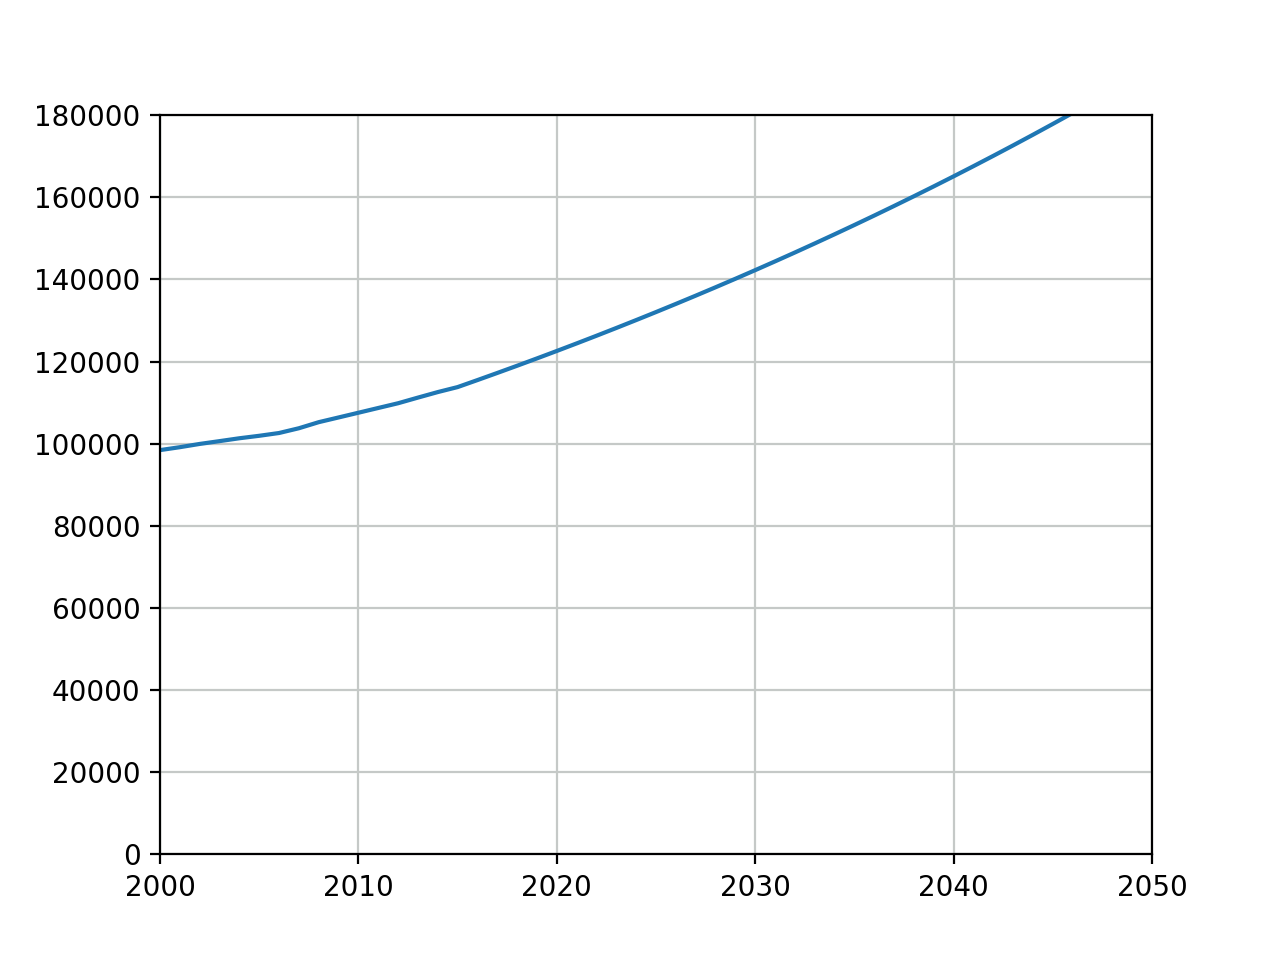

In [25]:
Cons_SE2050 = list((650/1.5)*3600*24*365*1e3*item*1e-12 for item in Pop)  # 650 W représente 30% de 2000 W part de chaleur de la société à 2000W

%matplotlib notebook
plt.figure('SE 2050')
plt.plot(range(2000, 2051), Cons_SE2050)
plt.axis([2000, 2050, 0, 180000])
plt.grid(color= 'xkcd:silver')

In [26]:
np.asarray(NewHeatNeed)*np.asarray(NewSre)

array([  1.77283529e+11,   1.76157877e+11,   1.75049952e+11,
         1.73959644e+11,   1.72886840e+11,   1.71831433e+11,
         1.70793314e+11,   1.69772378e+11,   1.68768522e+11,
         1.67781643e+11,   1.66811640e+11,   1.65858416e+11,
         1.64921873e+11,   1.64001916e+11,   1.63098451e+11,
         1.62211386e+11,   1.61340631e+11,   1.60486097e+11,
         1.59647698e+11,   1.58825347e+11,   1.58018960e+11,
         1.57228457e+11,   1.56453755e+11,   1.55694776e+11,
         1.54951442e+11,   1.54223678e+11,   1.53511409e+11,
         1.52814562e+11,   1.52133066e+11,   1.51466852e+11,
         1.50815851e+11,   1.50179997e+11,   1.49559225e+11,
         1.48953470e+11,   1.48362672e+11,   1.47786768e+11])

<IPython.core.display.Javascript object>


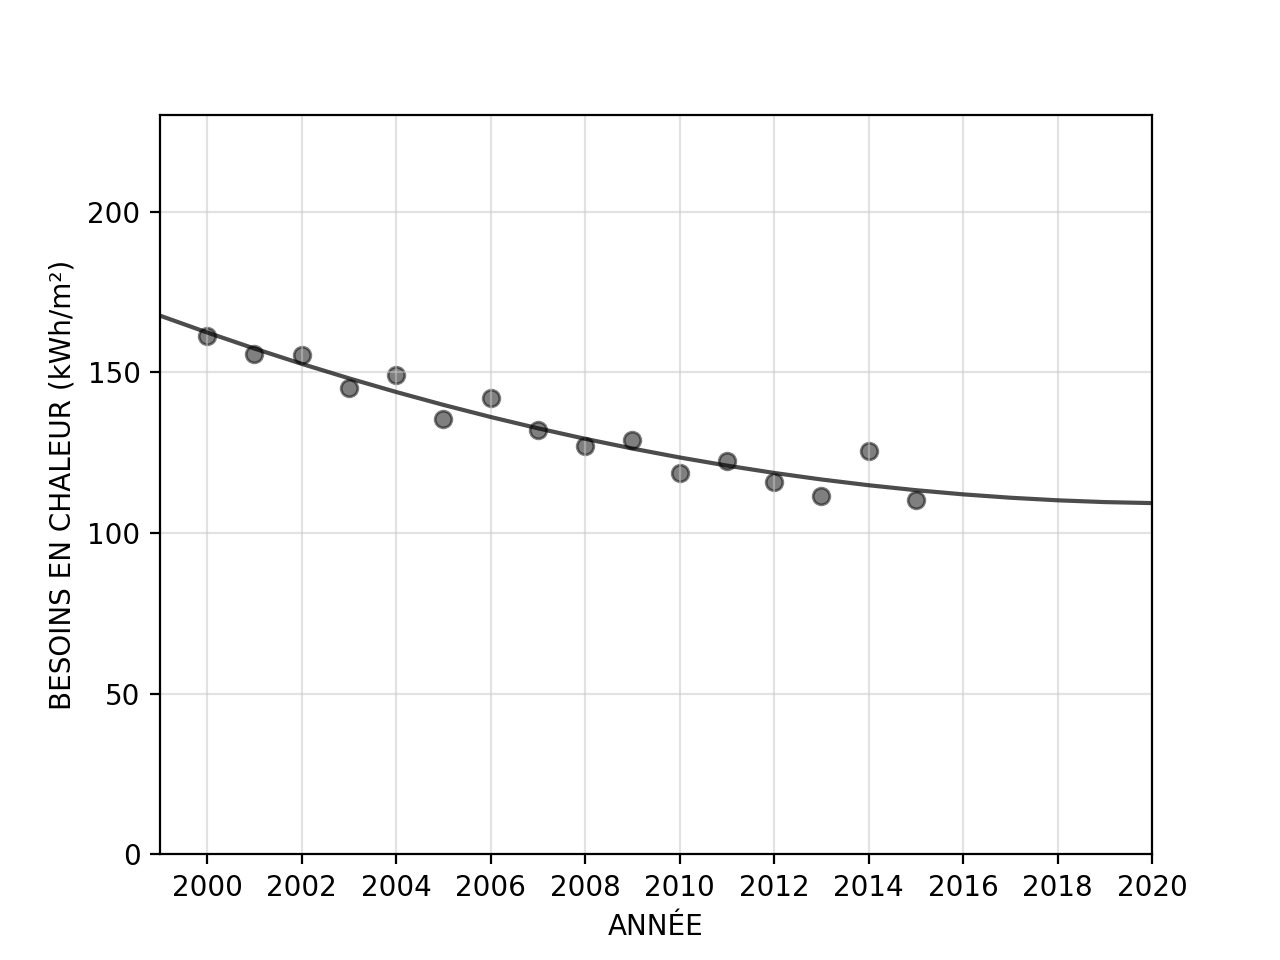

In [53]:
z = np.polyfit(range(2000, 2016), OldHeatNeed/3.6, 2)
p = np.poly1d(z)

plt.figure('Évolution des besoins en chaleur')
plt.scatter(range(2000, 2016), OldHeatNeed/3.6, color='black', alpha=0.5)
plt.plot(range(1999, 2030), p(range(1999, 2030)), color= 'black', alpha=0.7)
plt.axis([1999, 2020, 0, 230])
plt.ylabel('BESOINS EN CHALEUR (kWh/m²)')
plt.xlabel('ANNÉE')
plt.grid(color= 'xkcd:silver', alpha=0.5)
plt.xticks(range(2000, 2021, 2))
plt.savefig('heat_need_evolution')

In [28]:
CityEmis = pd.read_excel(os.path.join('../RAW_DATA/CO2-emissions.xlsx'), sheetname = 'Tous les GES par secteur CO2-V', skipfooter = 10)
CityEmis = pd.DataFrame({
    'Année': list(range(2000, 2016)),
    'Emissions': CityEmis.iloc[12:,0]
})
CityEmis.reset_index(drop=True, inplace=True)
CityEmis = pd.merge(CityEmis, DegJour)
CityEmis['Emissions corrigée (M. Téq)'] = CityEmis['Emissions']/CityEmis['Degré.jour']*2238

In [29]:
np.random.normal(loc=1, scale=0.01, size=35)

array([ 0.98956077,  1.00332287,  1.00041806,  0.99658586,  1.00087926,
        0.9965117 ,  1.00468376,  0.99552286,  0.98950279,  0.97460413,
        1.00353275,  0.98842442,  0.99814412,  0.99236853,  0.99135165,
        0.981073  ,  0.99713814,  1.01830033,  1.01374423,  1.00104882,
        0.99531302,  0.99634114,  0.98418918,  0.99622668,  1.00208825,
        1.00350248,  0.99549319,  1.00907406,  1.00297141,  0.99985106,
        1.00269515,  1.01002288,  1.00404745,  0.97819479,  0.99592406])

In [30]:
UpdateOilCons = list(1e-6*np.asarray(NewSre)*np.asarray(NewHeatNeed)*EnerMix['oil']/efficiency['oil'])
UpdateOilCons = np.random.normal(loc=1, scale=0.01, size=36)*np.asanyarray(UpdateOilCons)

In [31]:
global_eff = float(sum(efficiency[k]*OldEnerMix[k] for k in efficiency))

In [32]:
CO2_emissions = {

    'coal': 0.450/3.6e3,
    'oil': 0.301/3.6e3,
    'gas': 0.228/3.6e3,
    'direct_elec': 0.078/3.6e3,
    'heating_pump': 0.078/3.6e3,
    'wood': 0.050/3.6e3,
    'thermal': 0.030/3.6e3
}

In [33]:
UpdateCoalCons = list(1e-6*np.asarray(NewSre)*np.asarray(NewHeatNeed)*EnerMix['coal']/efficiency['coal'])
UpdateCoalCons= np.random.normal(loc=1, scale=0.01, size=36)*np.asanyarray(UpdateCoalCons)
UpdateOilCons = list(1e-6*np.asarray(NewSre)*np.asarray(NewHeatNeed)*EnerMix['oil']/efficiency['oil'])
UpdateOilCons = np.random.normal(loc=1, scale=0.01, size=36)*np.asanyarray(UpdateOilCons)
UpdateGasCons = list(1e-6*np.asarray(NewSre)*np.asarray(NewHeatNeed)*EnerMix['gas']/efficiency['gas'])
UpdateGasCons = np.random.normal(loc=1, scale=0.01, size=36)*np.asanyarray(UpdateGasCons)
UpdateDirectElecCons = list(1e-6*np.asarray(NewSre)*np.asarray(NewHeatNeed)*EnerMix['direct_elec']/efficiency['direct_elec'])
UpdateDirectElecCons = np.random.normal(loc=1, scale=0.01, size=36)*np.asanyarray(UpdateDirectElecCons)
UpdateHeatPumpCons = list(1e-6*np.asarray(NewSre)*np.asarray(NewHeatNeed)*EnerMix['heating_pump']/efficiency['heating_pump'])
UpdateHeatPumpCons = np.random.normal(loc=1, scale=0.01, size=36)*np.asanyarray(UpdateHeatPumpCons)
UpdateWoodCons = list(1e-6*np.asarray(NewSre)*np.asarray(NewHeatNeed)*EnerMix['wood']/efficiency['wood'])
UpdateWoodCons = np.random.normal(loc=1, scale=0.01, size=36)*np.asanyarray(UpdateWoodCons)
UpdateTherCons = list(1e-6*np.asarray(NewSre)*np.asarray(NewHeatNeed)*EnerMix['thermal']/efficiency['thermal'])
UpdateTherCons = np.random.normal(loc=1, scale=0.01, size=36)*np.asanyarray(UpdateTherCons)

In [34]:
UpdateGasCons

array([ 48601.66009787,  48080.02436369,  47276.61528071,  47105.12661301,
        46041.99562745,  45817.98265888,  45436.350626  ,  45196.21724772,
        44255.50480203,  44111.79768429,  43983.1076456 ,  43004.14083859,
        42585.03879089,  41899.15482014,  42075.43980983,  40612.18990542,
        40514.75033364,  40738.15519139,  40461.89010958,  39379.25865946,
        38572.24228997,  38619.25230755,  38344.3752155 ,  36983.7982786 ,
        36988.98649398,  36816.91037306,  35992.01425647,  35923.14185024,
        35387.81672587,  35507.75643783,  34396.40992286,  33653.14446838,
        34297.16523778,  33577.93152602,  33153.10909595,  32741.68646686])

In [35]:
y11 = list(UpdateCoalCons)
y21 = list(UpdateCoalCons+UpdateOilCons for UpdateCoalCons, UpdateOilCons in zip(UpdateCoalCons, UpdateOilCons))
y31 = list(UpdateCoalCons+UpdateOilCons+UpdateGasCons for UpdateCoalCons, UpdateOilCons, UpdateGasCons in zip(UpdateCoalCons, UpdateOilCons, UpdateGasCons))
y41 = list(UpdateCoalCons+UpdateOilCons+UpdateGasCons+UpdateDirectElecCons for UpdateCoalCons, UpdateOilCons, UpdateGasCons, UpdateDirectElecCons in zip(UpdateCoalCons, UpdateOilCons, UpdateGasCons, UpdateDirectElecCons))
y51 = list(UpdateCoalCons+UpdateOilCons+UpdateGasCons+UpdateDirectElecCons+UpdateHeatPumpCons for UpdateCoalCons, UpdateOilCons, UpdateGasCons, UpdateDirectElecCons, UpdateHeatPumpCons in zip(UpdateCoalCons, UpdateOilCons, UpdateGasCons, UpdateDirectElecCons, UpdateHeatPumpCons))
y61 = list(UpdateCoalCons+UpdateOilCons+UpdateGasCons+UpdateDirectElecCons+UpdateHeatPumpCons+UpdateWoodCons for UpdateCoalCons, UpdateOilCons, UpdateGasCons, UpdateDirectElecCons, UpdateHeatPumpCons, UpdateWoodCons in zip(UpdateCoalCons, UpdateOilCons, UpdateGasCons, UpdateDirectElecCons, UpdateHeatPumpCons, UpdateWoodCons))
y71 = list(UpdateCoalCons+UpdateOilCons+UpdateGasCons+UpdateDirectElecCons+UpdateHeatPumpCons+UpdateWoodCons+UpdateTherCons for UpdateCoalCons, UpdateOilCons, UpdateGasCons, UpdateDirectElecCons, UpdateHeatPumpCons, UpdateWoodCons, UpdateTherCons in zip(UpdateCoalCons, UpdateOilCons, UpdateGasCons, UpdateDirectElecCons, UpdateHeatPumpCons, UpdateWoodCons, UpdateTherCons))

In [36]:
CO2_mix = pd.DataFrame({
    
    'coal': EnerMix['coal']*CO2_emissions['coal'],
    'oil': EnerMix['oil']*CO2_emissions['oil'],
    'gas': EnerMix['gas']*CO2_emissions['gas'],
    'direct_elec': EnerMix['direct_elec']*CO2_emissions['direct_elec'],
    'heating_pump': EnerMix['heating_pump']*CO2_emissions['heating_pump'],
    'wood': EnerMix['wood']*CO2_emissions['wood'],
    'thermal': EnerMix['thermal']*CO2_emissions['thermal']
    
})

In [37]:
CO2_mix.sum(axis=1)*y71

0     10.960150
1     10.756731
2     10.420204
3     10.203802
4      9.823948
5      9.620807
6      9.425229
7      9.127032
8      8.935805
9      8.696611
10     8.503189
11     8.237710
12     8.024253
13     7.806444
14     7.630588
15     7.397953
16     7.201377
17     7.011753
18     6.902580
19     6.656253
20     6.380401
21     6.302854
22     6.132914
23     5.922356
24     5.768130
25     5.594305
26     5.404659
27     5.278352
28     5.086744
29     4.954036
30     4.788223
31     4.628255
32     4.505918
33     4.378407
34     4.177671
35     4.063659
dtype: float64

In [38]:
for i, ii in zip(range(2001, 2016), range(1, 16)):
    
    EnerMix = pd.DataFrame({
        
        'year' : [i],
        'coal' : CoalCons.iloc[ii]/TotCons.iloc[ii],
        'oil' : OilCons.iloc[ii]/TotCons.iloc[ii],
        'gas' : GasCons.iloc[ii]/TotCons.iloc[ii],
        'direct_elec' : DirectElecCons.iloc[ii]/TotCons.iloc[ii],
        'heating_pump' : HeatPumpCons.iloc[ii]/TotCons.iloc[ii],
        'wood' : WoodCons.iloc[ii]/TotCons.iloc[ii],
        'thermal' : TherCons.iloc[ii]/TotCons.iloc[ii]
    })
    
    OldEnerMix = OldEnerMix.append(EnerMix)

In [39]:
CO2_mix = pd.DataFrame({
    
    'coal': OldEnerMix['coal']*0.450/1e3,
    'oil': OldEnerMix['oil']*0.301/1e3,
    'gas': OldEnerMix['gas']*0.228/1e3,
    'direct_elec': OldEnerMix['direct_elec']*0.078/1e3,
    'heating_pump': OldEnerMix['heating_pump']*0.078/1e3,
    'wood': OldEnerMix['wood']*0.050/1e3,
    'thermal': OldEnerMix['thermal']*0.030/1e3
    
})

In [40]:
dff = CO2_mix.iloc[1:]
dff.reset_index(drop=True, inplace=True)
C = dff['coal']*CoalCons
C.dropna(inplace=True)
O = dff['oil']*OilCons
O.dropna(inplace=True)
G = dff['gas']*GasCons
G.dropna(inplace=True)
D = dff['direct_elec']*DirectElecCons
D.dropna(inplace=True)
H = dff['heating_pump']*HeatPumpCons
H.dropna(inplace=True)
W = dff['wood']*WoodCons
W.dropna(inplace=True)
T = dff['thermal']*TherCons
T.dropna(inplace=True)


<IPython.core.display.Javascript object>


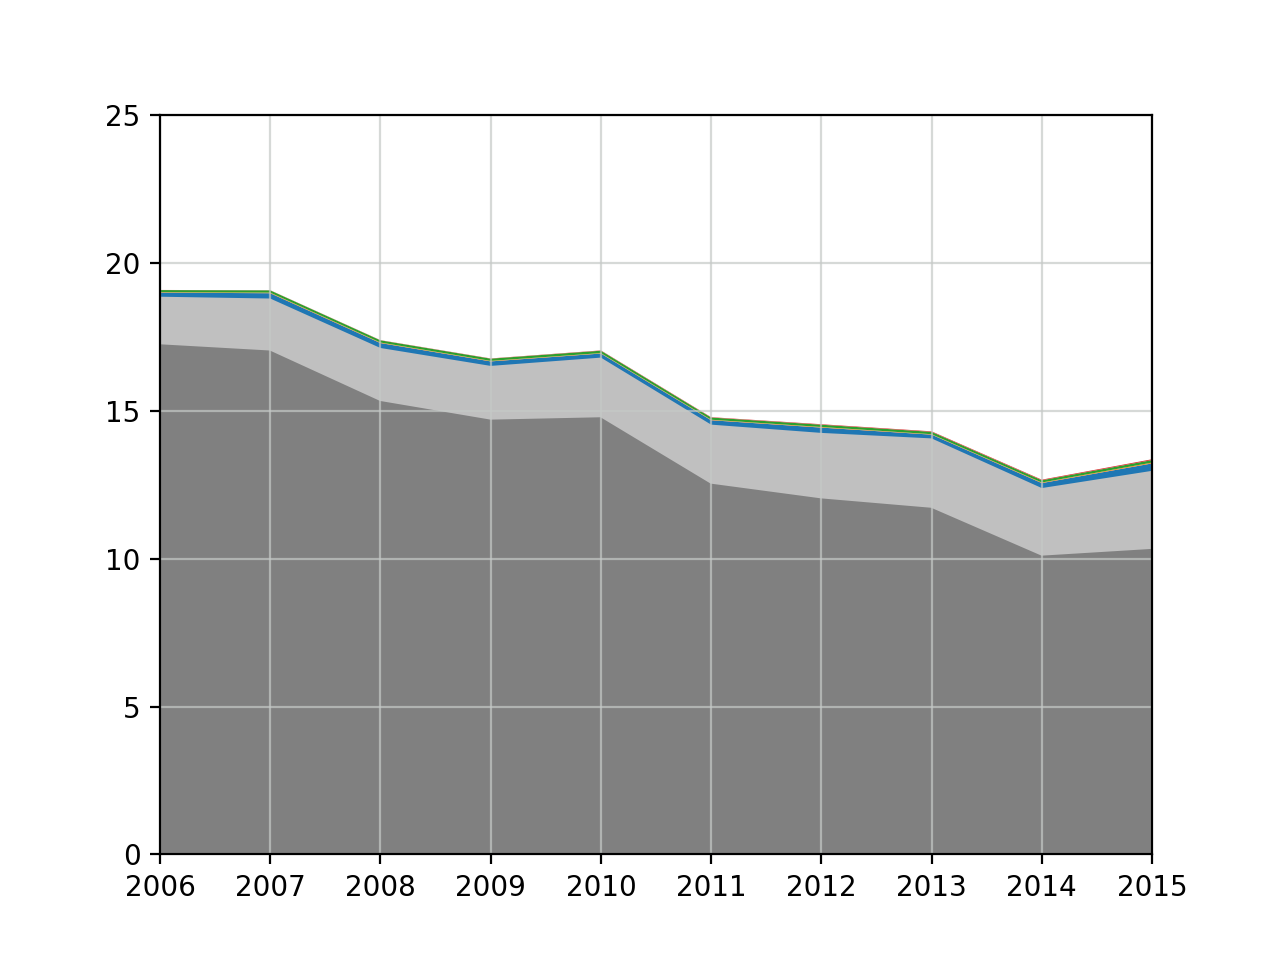

In [41]:
plt.figure('Émissions par agent')
plt.fill_between(range(2001, 2016), 0, C, color='black')
plt.fill_between(range(2001, 2016), C, C+O, color='grey')
plt.fill_between(range(2001, 2016), C+O, C+O+G, color='silver')
plt.fill_between(range(2001, 2016), C+O+G, C+O+G+D)
plt.fill_between(range(2001, 2016), C+O+G+D, C+O+G+D+H)
plt.fill_between(range(2001, 2016), C+O+G+D+H, C+O+G+D+H+W)
plt.fill_between(range(2001, 2016), C+O+G+D+H+W, C+O+G+D+H+W+T)
plt.axis([2006, 2015, 0, 25])
plt.ylabel
plt.grid(color='xkcd:silver', alpha=0.7)

In [42]:
y11 = list(CoalCons)
y21 = list(CoalCons+OilCons for CoalCons, OilCons in zip(CoalCons, OilCons))
y31 = list(CoalCons+OilCons+GasCons for CoalCons, OilCons, GasCons in zip(CoalCons, OilCons, GasCons))
y41 = list(CoalCons+OilCons+GasCons+DirectElecCons for CoalCons, OilCons, GasCons, DirectElecCons in zip(CoalCons, OilCons, GasCons, DirectElecCons))
y51 = list(CoalCons+OilCons+GasCons+DirectElecCons+HeatPumpCons for CoalCons, OilCons, GasCons, DirectElecCons, HeatPumpCons in zip(CoalCons, OilCons, GasCons, DirectElecCons, HeatPumpCons))
y61 = list(CoalCons+OilCons+GasCons+DirectElecCons+HeatPumpCons+WoodCons for CoalCons, OilCons, GasCons, DirectElecCons, HeatPumpCons, WoodCons in zip(CoalCons, OilCons, GasCons, DirectElecCons, HeatPumpCons, WoodCons))
y71 = list(CoalCons+OilCons+GasCons+DirectElecCons+HeatPumpCons+WoodCons+TherCons for CoalCons, OilCons, GasCons, DirectElecCons, HeatPumpCons, WoodCons, TherCons in zip(CoalCons, OilCons, GasCons, DirectElecCons, HeatPumpCons, WoodCons, TherCons))